Subjectivity score \\

In [1]:
#create a pandas dataframe
import pandas as pd
path = 'all_models.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0'], axis=1)

Subjectivity of responses for the same LLM \\
Scores computed for each response

In [3]:
import re
import torch
from textblob import TextBlob
from itertools import combinations
import numpy as np
from collections import defaultdict

all_scores = []
all_sys = []
prompts = df.prompt.unique()

for system in ['gemma', 'gpt35', 'anthropic', 'gpt4o', 'llama', 'mistral']:

# for system in ['gemma']:
    df_sys = df[df['model']==system] # similarity within the same system

    for prompt in prompts:
        # Dataframe with all entries for a specific query
        df_prmp = df_sys[df_sys['prompt']==prompt] # similarity within same queries

        for row in range(len(df_prmp.index)):
          reasons_per_row = ''
          for rec in ['rec_reasons1', 'rec_reasons2', 'rec_reasons3', 'rec_reasons4', 'rec_reasons5']:
              reason = df_prmp.iloc[row][rec]
              reason = reason.replace('\\n',' ')
              # preprocess text (rm punctuations)
              reason = reason.lower()
              # apprend to list
              reasons_per_row = reasons_per_row + reason
          blob = TextBlob(reasons_per_row)
          all_scores.append(blob.sentiment.subjectivity)
          all_sys.append(system)

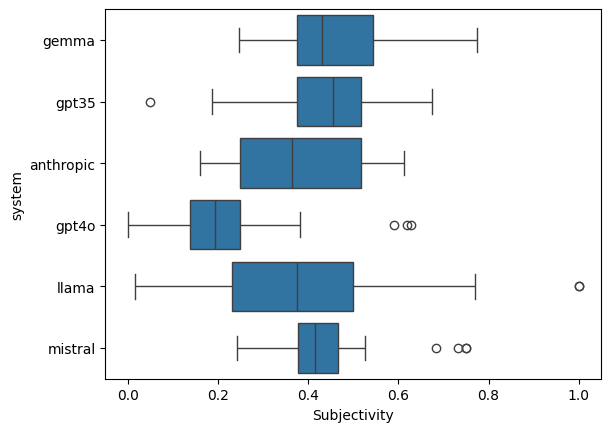

In [6]:
import pandas as pd
import seaborn as sns

jaccard = pd.DataFrame({"system": all_sys, "Subjectivity": all_scores})
sns.boxplot(data=jaccard, x="Subjectivity", y="system")
# sns.violinplot(data=jaccard, x="Cosine similarity", y="system", split=True, inner="quart")
sns.set_style("darkgrid")
#g = sns.violinplot(data=jaccard, x="Jaccard Similarity", y="system", inner="point")
#g.set(xlim=(0, 1))